In [6]:
# 导包
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

def sigmoid_activation(x):
    # sigmoid函数
    return 1.0 / (1 + np.exp(-x))

def predict(X, W):
    # 求W点积x，可以将所有x合在一起组成向量X一口气计算点积
    # 点积结果每一维都是一个样本对应的得分
    # 然后对得分向量求sigmoid得到每一维对应的输出
    preds = sigmoid_activation(X.dot(W))

    # 根据门限值使用阶跃函数进行二分类,得到预测类别标签向量
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

def plot_hyperplane(W, data, labels, prefix):
    # 先画训练集
    plt.style.use("ggplot")
    plt.figure()
    plt.title(prefix)
    plt.scatter(data[:, 0], data[:, 1], marker="o", c=np.squeeze(labels), s=30)

    # 定义自变量和因变量
    x = np.linspace(-10, 10)
    y = (-W[0]*x - W[2]) / W[1]

    # 画图
    plt.plot(x, y, label='Hyperplane')
    plt.xlabel('x label')
    limits = [-20, 20, -20, 20]
    plt.axis(limits)
    plt.ylabel('y label')
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


样本点：
[[-3.71  8.55]
 [ 7.35  4.61]
 [-3.87  9.29]]
类别：
[[0]
 [1]
 [0]]


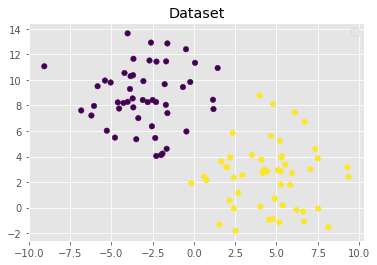

In [7]:
# 训练参数
epochs = 100
alpha = 0.01
# 输出小数点后位数
np.set_printoptions(precision=2)

# 生成n_samples个点的N分类问题，类别数=centers
# X是样本点, y是对应类别
# 其中每个数据点都是一个n_features维的向量
# cluster_std是聚类标准差, 按照先后顺序控制每个类样本的聚合度，越大越密集
(X, y) = make_blobs(n_samples=100, n_features=2, centers=2,
                    cluster_std=[2.5, 2.5], random_state=42)

# 从行向量变成列向量，因为样本点X是列向量
y = y.reshape((y.shape[0], 1))

print('样本点：\n{}'.format(X[0:3]))
print('类别：\n{}'.format(y[0:3]))
# 绘制分类数据
plt.style.use("ggplot")
plt.figure()
plt.title("Dataset")
plt.scatter(X[:, 0], X[:, 1], marker="o", c= np.squeeze(y), s= 30)
plt.legend()
plt.show()

In [8]:
# 在W最后插入一列1将W和b合并
# 在X每个数据点后增加一项表示偏置（初始化为1）
X = np.c_[X, np.ones((X.shape[0]))]  
print('样本点：\n{}'.format(X[0:3]))
print('类别：\n{}'.format(y[0:3]))

样本点：
[[-3.71  8.55  1.  ]
 [ 7.35  4.61  1.  ]
 [-3.87  9.29  1.  ]]
类别：
[[0]
 [1]
 [0]]


No handles with labels found to put in legend.


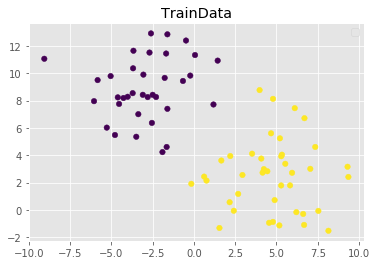

In [9]:
# 将数据集分为训练集和测试集
(trainX, testX, trainY, testY) = train_test_split(X, y,
                                                  test_size=0.25, random_state=1)

# 绘制测试集
plt.style.use("ggplot")
plt.figure()
plt.title("TrainData")
plt.scatter(trainX[:, 0], trainX[:, 1], marker="o", c= np.squeeze(trainY), s= 30)
plt.legend()
plt.show()

In [10]:
# 初始化权重矩阵W和损失list
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)  # 随机初始化权重（包括偏置）
print('权重矩阵：\n{}'.format(W))
losses = []

[INFO] training...
权重矩阵：
[[0.36]
 [0.15]
 [1.98]]


[INFO] epoch=1
样本维度：75×3
权重维度：3×1
权重和维度：75×1
激活输出维度：75×1
损失：27.697
更新前的权重：
[[0.36]
 [0.15]
 [1.98]]
误差对权重的梯度：
[[-87.62]
 [276.39]
 [ 29.98]]
更新后的权重：
[[ 1.23]
 [-2.61]
 [ 1.68]]



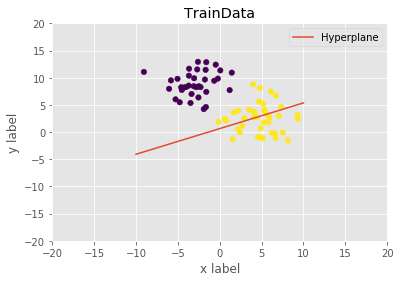

[INFO] epoch=100
样本维度：75×3
权重维度：3×1
权重和维度：75×1
激活输出维度：75×1
损失：0.206
更新前的权重：
[[ 2.38]
 [-0.9 ]
 [ 2.55]]
误差对权重的梯度：
[[-0.03]
 [ 0.09]
 [-0.46]]
更新后的权重：
[[ 2.38]
 [-0.9 ]
 [ 2.55]]



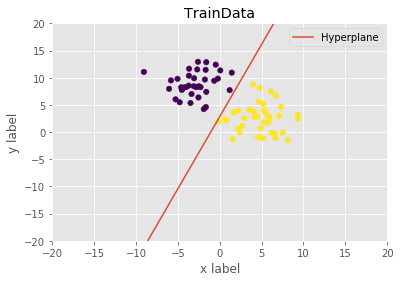

In [11]:
# 迭代优化
for epoch in np.arange(0, epochs):
    # 类别预测值y = sig(Wx)
    preds = sigmoid_activation(trainX.dot(W))
    """ 这里trainX.dot(W)是把所有样本一起求权重和
        然后得到一个维度等于样本数的列向量
        每一维是某个样本的权重和
    """
    # 预测误差=预测类别值-真实类别值
    error = preds - trainY
    
    # 所有样本的平方误差之和
    loss = np.sum(error ** 2)  
    losses.append(loss)
    
    # 先将训练集转置成3行1000列
    # 然后求梯度 = 输入特征向量点积预测误差
    gradient = trainX.T.dot(error)
    
    # 更新权重阶段，我们需要沿着梯度的反方向微调权重
    W_old = W.copy()
    W += -alpha * gradient
    
    # 显示更新情况
    displayUpdate = 100
    if epoch == 0 or (epoch + 1) % displayUpdate == 0:
        print("[INFO] epoch={}".format(int(epoch + 1)))
        print('样本维度：{}×{}'.format(trainX.shape[0], trainX.shape[1]))
        print('权重维度：{}×{}'.format(W.shape[0], W.shape[1]))
        print('权重和维度：{}×{}'.format(trainX.dot(W).shape[0], trainX.dot(W).shape[1]))
        print('激活输出维度：{}×{}'.format(preds.shape[0], preds.shape[1]))
        print('损失：{:.3f}'.format(loss))
        print('更新前的权重：\n{}'.format(W_old))        
        print('误差对权重的梯度：\n{}'.format(gradient))
        print('更新后的权重：\n{}\n'.format(W))
        plot_hyperplane(W, trainX, trainY, 'TrainData')


[INFO] evaluating...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        25



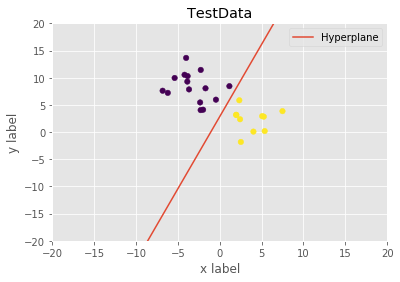

In [12]:
# 评估模型
print("[INFO] evaluating...")
# 使用训练好的模型W对测试集进行分类，得到类别标签向量
preds = predict(testX, W)
print(classification_report(testY, preds))
plot_hyperplane(W, testX, testY, 'TestData')